In [103]:
import pandas as pd
import numpy as np


data=pd.read_csv('tempo80.txt',header=None)
data.columns = ['runid','asn','moteid','collision']

Data = pd.DataFrame()
length = len(data)



index=list(range(length))
#run=4

grouped=data.groupby('runid')
#print('**************',grouped.groups.keys())

for run in grouped.groups.keys():
    _grp          = grouped.get_group(run)
    grp           = _grp[['asn','collision' ]]
    grp_counts    = grp.groupby(['asn']).count().reset_index().sort_values(by='asn', ascending=True)
    grp_indexed   = grp_counts.set_index('asn')
    grp_filled    = grp_indexed.reindex(index, fill_value=0)
    grp_collision = grp_filled['collision']
    Data[run] = grp_collision

# add  last column to Data with average collisions over runs
Data['collision for 80 motes']= Data.mean(axis=1)

print(Data)

#print(Data['Average_nbr_collision'])
Data['standard_deviation']= Data.std()

# if I would like to print a given set of the Data. here it is the first 200 elements
new_set_of_data=Data['collision for 80 motes'].head(250)

#new_set_of_data

       0  1  2  3  4  5  6  7  8  9           ...            204  205  206  \
asn                                           ...                            
0      0  0  0  0  0  0  0  0  0  0           ...              0    0    0   
1      0  0  0  0  0  0  0  0  0  0           ...              0    0    0   
2      3  0  0  0  0  0  0  0  0  4           ...              0    0    0   
3      0  4  0  0  0  0  2  0  0  0           ...              0    0    0   
4      0  0  0  0  0  0  0  0  0  0           ...              0    1    0   
5      0  0  0  0  0  0  3  0  0  0           ...              0    0    0   
6      0  0  0  0  3  0  1  0  0  0           ...              0    0    0   
7      1  2  0  0  0  0  0  0  0  0           ...              3    0    0   
8      0  0  4  0  0  0  0  0  0  0           ...              0    0    0   
9      0  0  0  0  1  4  0  0  0  0           ...              4    0    0   
10     0  0  0  1  0  2  0  0  0  0           ...              0

[Text(0,0.5,'Average collided packets'), Text(0.5,0,'Slotframe cycle')]

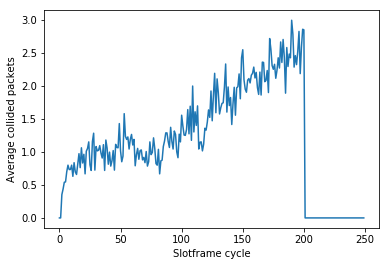

In [100]:
#from numpy import *
import matplotlib.pyplot as plt

figure= new_set_of_data.plot(y='collision for 80 motes')
#figure2= Data.plot(y='standard_deviation')


figure.set(xlabel="Slotframe cycle", ylabel="Average collided packets")